[View in Colaboratory](https://colab.research.google.com/github/freesemt/stewart-acid-base-model/blob/master/notebooks/hh_equation.ipynb)

pH= 7.401478308584622


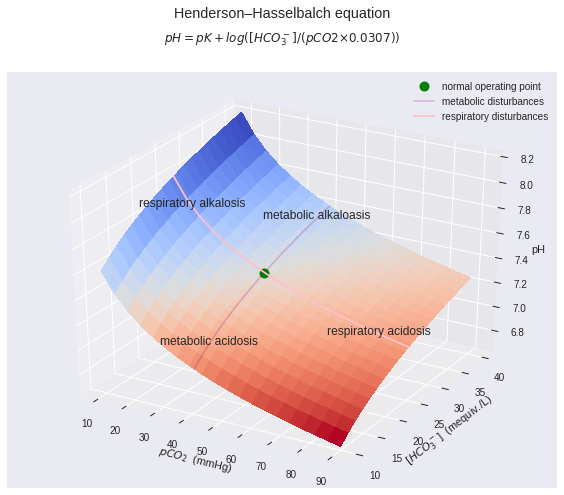

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append('local_modules/OurUtils')
from OurColormap import reverse_colourmap

import seaborn
seaborn.set()

pK = 6.1

fig = plt.figure( figsize=(8, 7) )
fig.suptitle( "Henderson–Hasselbalch equation" )

ax  = fig.add_subplot(111, projection='3d')
ax.set_title( "$pH = pK + log([HCO_3^-]/(pCO2×0.0307))$", y=1.15 )
ax.set_xlabel( "$pCO_2$  (mmHg)" )
ax.set_ylabel( "$[HCO_3^-]$  (mequiv./L)" )
ax.set_zlabel( "pH" )

x = np.linspace(10, 90, 20)
y = np.linspace(10, 40, 20)
X, Y = np.meshgrid(x, y)
Z = pK + np.log10( Y/(X*0.0307) )
cmap_r = reverse_colourmap(cm.coolwarm)
surf = ax.plot_surface(X, Y, Z, cmap=cmap_r,
                       linewidth=0, antialiased=False)
pCO2 = 41
HCO3 = 25.2
pH = pK + np.log10( HCO3/(pCO2*0.0307) )
print( 'pH=', pH )
ax.plot( [pCO2], [HCO3], [pH], 'o', color='green', markersize=10, label='normal operating point' )

x_ = np.ones(len(x))*pCO2
zm = pK + np.log10( y/(x_*0.0307) )
ax.plot( x_, y, zm, label='metabolic disturbances', color='purple', alpha=0.2 )
y_ = np.ones(len(y))*HCO3
zr = pK + np.log10( y_/(x*0.0307) )
ax.plot( x, y_, zr, label='respiratory disturbances', color='pink' )

text_params = [ [ 'metabolic acidosis',     pCO2,   HCO3*0.2 + y[0]*0.8],
                [ 'metabolic alkaloasis',   pCO2,   HCO3*0.2 + y[-1]*0.8],
                [ 'respiratory acidosis',   pCO2*0.2 + x[-1]*0.8,    HCO3],
                [ 'respiratory alkalosis',  pCO2*0.2 + x[0]*0.8,   HCO3]
                ]

for tt, tx, ty in text_params:
    tz = pK + np.log10( ty/(tx*0.0307) )
    ax.text( tx, ty, tz, tt, ha='center' )

ax.legend(  )
fig.tight_layout()
fig.subplots_adjust( top=0.85 )

plt.show()
